In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np


In [2]:
def TI_file2DF(file_name):
    stats = pd.DataFrame()
    waiting_times = pd.DataFrame()
    root = ET.parse(file_name).getroot()
    #root = ET.parse('./Veh350_pufferFull_rebalanced_preshed_param2/' + file_name).getroot()
    # make person_kpi DataFrame
    for person_id in root.iter('personinfo'):
        i = 0
        for ride_id in person_id.iter('ride'):
            waiting_times.loc[person_id.get('id') + '_' + str(i), 'waiting_time'] = float(ride_id.get('waitingTime'))
            waiting_times.loc[person_id.get('id') + '_' + str(i), 'departure'] = float(ride_id.get('depart')) / 3600
            waiting_times.loc[person_id.get('id') + '_' + str(i), 'duration'] = float(ride_id.get('duration'))
            waiting_times.loc[person_id.get('id') + '_' + str(i), 'route_length'] = float(ride_id.get('routeLength'))
            i += 1

    
    # make vehicle_kpi DataFrame
    for ride_id in root.iter('tripinfo'):
        if "taxi" in ride_id.get('id'): 
            stats.loc[ride_id.get('id'), 'dist_total'] = float(ride_id.get('routeLength'))
            stats.loc[ride_id.get('id'), 'dist_occ'] = float(ride_id.findall('taxi')[0].get("occupiedDistance"))
            stats.loc[ride_id.get('id'), 'dist_empty'] = stats.loc[ride_id.get('id'), 'dist_total'] - stats.loc[
                ride_id.get('id'), 'dist_occ']
            stats.loc[ride_id.get('id'), 'time_occ'] = float(ride_id.findall('taxi')[0].get("occupiedTime"))
            stats.loc[ride_id.get('id'), 'time_empty'] = float(ride_id.get('duration')) - stats.loc[
                ride_id.get('id'), 'time_occ']
            stats.loc[ride_id.get('id'), 'nr_customers'] = ride_id.findall('taxi')[0].get("customers")
        
    return waiting_times, stats



In [3]:
def ROU_file2DF(file_name, keyword):
    person_trips = pd.DataFrame()
    root = ET.parse(file_name).getroot()
    #root = ET.parse('./Veh350_pufferFull_rebalanced_preshed_param2/' + file_name).getroot()
    # make person_kpi DataFrame
    #for person_id in root.iter('person'):
    for person_id in root.iter(keyword):
        person_trips.loc[person_id.get('id'), 'departure'] = float(person_id.get('depart')) / 3600

    return person_trips

In [5]:
miv_trips = ROU_file2DF('../SUMOSIM/SUMOSIM_Freiham/route_files/osm-test-veh.rou.xml','trip')
school_trips = ROU_file2DF('../SUMOSIM/SUMOSIM_Freiham/route_files/osm-test-school.rou.xml','person')
person_trips = ROU_file2DF('../SUMOSIM/SUMOSIM_Freiham/route_files/osm-test-ped.rou.xml','person')
#person_trips = ROU_file2DF('../osm-test-ped.rou.xml')







(0.0, 0.09)

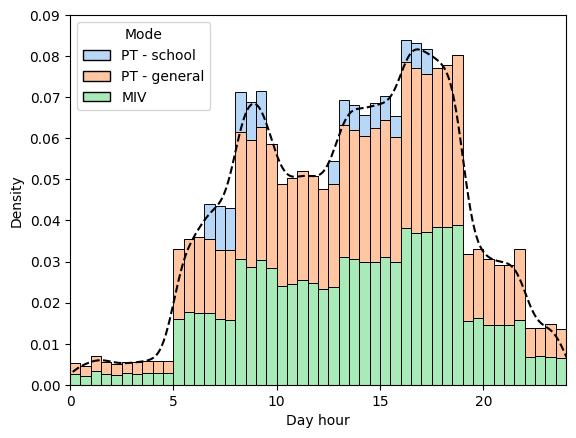

In [21]:
tot_trips = pd.concat([school_trips, person_trips, miv_trips ], keys=['PT - school', 'PT - general', 'MIV'], names=['Mode'])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.histplot(data=tot_trips, ax=ax1, stat="density", multiple="stack", binwidth=0.5,
             x="departure", kde=False,
             palette="pastel", hue="Mode",
             element="bars", legend=True)

tot_trips.head()
#person_trips['departure'].plot.hist(bins=100, density=True, color='#7FC29B', linewidth=0.5, alpha=0.8, zorder=3)
tot_trips['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
plt.xlim(0,24)
ax1.set_xlabel('Day hour')
ax2.set_xlabel('Day hour')
ax2.axis('off')
ax1.set_ylim(0,0.09)
ax2.set_ylim(0,0.09)

In [31]:
print("Comma separated list of filename(s) the figure shall be written to; " +\
                     "for multiple time intervals use \'\%s\' in the filename as a " +\
                     "placeholder for the beginning of the time interval")

Comma separated list of filename(s) the figure shall be written to; for multiple time intervals use '\%s' in the filename as a placeholder for the beginning of the time interval


In [72]:
print(miv_trips.shape[0])
print(school_trips.shape[0])
print(person_trips.shape[0])

22986
2856
24136


In [70]:
tot_trips.shape

(49978, 1)

(0.0, 24.0)

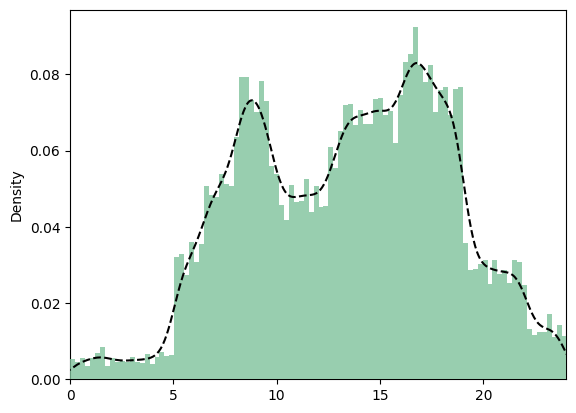

In [26]:
waiting_times, stats = TI_file2DF('./Veh450_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')


stats["occupancy_dist"] = stats["dist_occ"] / stats["dist_total"]
stats["occupancy_time"] = stats["time_occ"] / (60*60*24) # not sure if correct - how long is the total simulation duration, 24h!?


departures = pd.DataFrame()
root = ET.parse('./Veh450_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml').getroot()

for person_id in root.iter('personinfo'):
    i = 0
    for ride_id in person_id.iter('ride'):
        departures.loc[person_id.get('id') + '_' + str(i), 'departure'] = float(ride_id.get('depart')) / 3600
        departures.loc[person_id.get('id') + '_' + str(i), 'duration'] = float(ride_id.get('duration'))
        departures.loc[person_id.get('id') + '_' + str(i), 'route_length'] = float(ride_id.get('routeLength'))
        departures.loc[person_id.get('id') + '_' + str(i), 'waiting_time'] = float(ride_id.get('waitingTime'))

        #departures.loc[person_id.get('id') + str(i), 'departure'] = time.strftime('%H:%M:%S', time.gmtime(float(ride_id.get('depart'))))
        i += 1
departures['departure'].plot.hist(bins=100, density=True, color='#7FC29B', linewidth=0.5, alpha=0.8, zorder=3)
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--')
plt.xlim(0,24)
       

In [61]:
print("Size = " + str(departures.shape[0]))

Size = 25379


In [36]:
#waiting_times250, stats250 = TI_file2DF('./Veh250_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
#waiting_times300, stats300 = TI_file2DF('./Veh300_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
waiting_times350, stats350 = TI_file2DF('./Veh350_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
#waiting_times400, stats400 = TI_file2DF('./Veh400_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
waiting_times450, stats450 = TI_file2DF('./Veh450_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
#waiting_times500, stats500 = TI_file2DF('./Veh500_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')
waiting_times550, stats550 = TI_file2DF('./Veh550_pufferFull_rebalanced_sharedTraffic/tripinfo_output.xml')

for _, df in enumerate([stats250, stats300, stats350, stats400, stats450, stats500, stats550]): 
    df["occupancy_dist"] = df["dist_occ"] / df["dist_total"]
    df["occupancy_time"] = df["time_occ"] / (60*60*24)

276.22694390475795
466.28179901616306
134.4964242900252
141.73051961473274
118.02302509197635
16.473399198048853
114.68203050721343
3.3409945847629245
114.70261667562316
-0.020586168409735706
114.42850646934811
0.2741102062750542


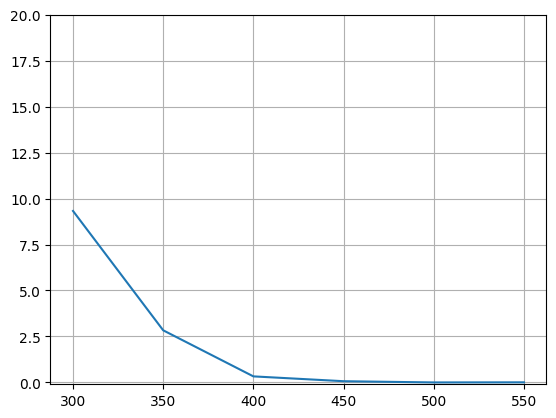

In [8]:
#stats450.shape
#stats450.head()

waiting_time_list = [waiting_times300, waiting_times350, waiting_times400, waiting_times450, waiting_times500, waiting_times550]
i = 0
anz = []
share_wt_anz = []

anz1 = stats250.shape[0]
wtime1 = waiting_times250.waiting_time.mean()

for _, df in enumerate([stats300, stats350, stats400, stats450, stats500, stats550]):
    anz2 = df.shape[0]
    wtime2 = waiting_time_list[i].waiting_time.mean()
    print(wtime2)
    
    deltaAnz = anz2-anz1
    deltaWTime = wtime1-wtime2 
    print(deltaWTime)
    
    share_wt_anz.append(deltaWTime/deltaAnz)
    anz.append(anz2)
    
    anz1 = anz2
    wtime1 = wtime2

    i += 1

fig, ax = plt.subplots()
ax.plot(anz, share_wt_anz)
ax.set_ylim(-0.1, 20)
ax.grid(True, which='both')
#ax.spines['bottom'].set_position(('data', 0))
#sns.set_style({'axes.edgecolor':'black'})
#sns.tight_layout(ax=ax, w_pad=0)



    
    



In [37]:
#dfs = [waiting_times250, waiting_times350, waiting_times450]

all_waiting_times = [[[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]
i = 0
#for _, df in enumerate([waiting_times350, waiting_times400, waiting_times450, waiting_times500, waiting_times550]):
for _, df in enumerate([waiting_times350, waiting_times450, waiting_times550]): 
    for h in range(0,24,1):
        subset = df[df['departure']<(h+1)]
        subset = subset[subset['departure']>h]
        all_waiting_times[i][0].append(subset.waiting_time.quantile(q=0.05))
        all_waiting_times[i][1].append(subset.waiting_time.mean())
        all_waiting_times[i][2].append(subset.waiting_time.quantile(q=0.95))
    i += 1
    


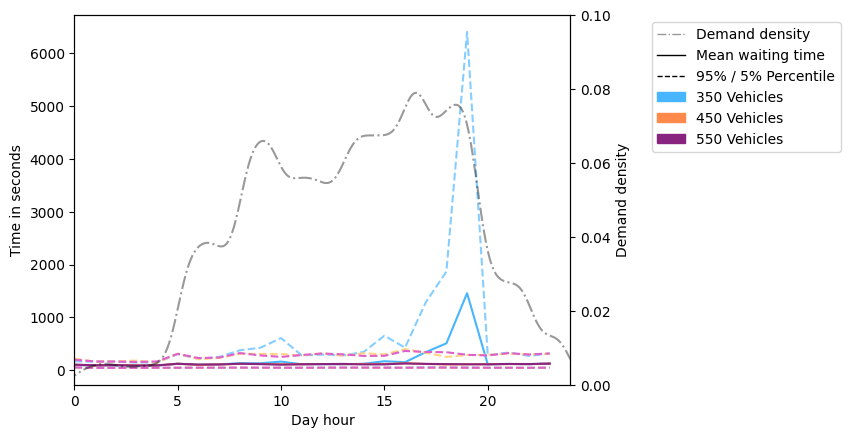

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
stylez = ['--', '-', '--']
#colorz = [["#9e8279", "#65483d", "#9e8279"], ["#f7ee4a", "#f5e900", "#f7ee4a"], ["#86ceff", "#47b5ff", "#86ceff"], ["#b1e693", "#6ecb63", "#b1e693"], ["#ffd384", "#ff884b", "#ffd384"] , ["#eb7389", "#d0364b", "#eb7389"], ["#de60ca", "#882380", "#de60ca"]]
colorz = [["#86ceff", "#47b5ff", "#86ceff"], ["#ffd384", "#ff884b", "#ffd384"], ["#de60ca", "#882380", "#de60ca"]]

for i in range(0,3):
    for j in range(0,3):
        ax1.plot([*range(0,24,1)], all_waiting_times[i][j], linestyle=stylez[j], color=colorz[i][j])

ax1.set_ylabel('Time in seconds')
waiting_times350['departure'].plot.density(color='k', alpha=0.4, bw_method=0.1, zorder=3, style='-.', ax=ax2)
ax2.set_ylabel('Demand density')
ax2.set_xlabel('Day hour')
ax1.set_xlabel('Day hour')

plt.xlim(0,24)
#ax1.set_ylim(0,800)
ax2.set_ylim(0,0.10)    


legend_elements = [Line2D([0], [0], color='black', linestyle='-.', lw=1, alpha=0.4, label='Demand density'),
                   Line2D([0], [0], color='black', linestyle='-', lw=1, label='Mean waiting time'),
                   Line2D([0], [0], color='black', linestyle='--', lw=1, label="95% / 5% Percentile"),
                   #Patch(color='#65483d', label='250 Vehicles'),
                   #Patch(color='#f5e900', label='300 Vehicles'),
                   Patch(color='#47b5ff', label='350 Vehicles'),
                   #Patch(color='#6ecb63', label='400 Vehicles'),
                   Patch(color='#ff884b', label='450 Vehicles'),
                   #Patch(color='#d0364b', label='500 Vehicles'),
                   Patch(color='#882380', label='550 Vehicles')]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.15, 1))


1181.5
344.5
308.0
302.0
302.0
304.5


(0.0, 1000.0)

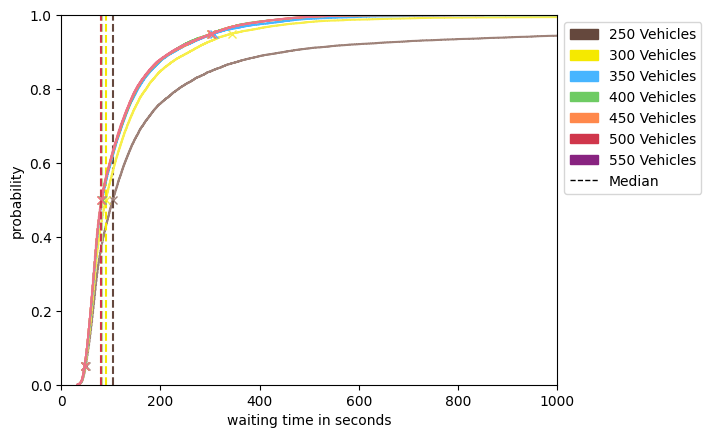

In [18]:
percentiles = [0.05, 0.50, 0.95]

color = [["#9e8279", "#65483d"], ["#f7ee4a", "#f5e900"], ["#47b5ff", "#dff6ff"], ["#6ecb63", "#b1e693"], ["#ff884b", "#ffd384"], ["#eb7389", "#d0364b"], ["#de60ca", "#882380"] ]
i=0
for _, df in enumerate([waiting_times300, waiting_times350, waiting_times400, waiting_times450, waiting_times500, waiting_times550]):
    pct_val = df.waiting_time.quantile(q=percentiles)
    print(pct_val[0.95])
    sns.ecdfplot(data=df.waiting_time, color=color[i][0])
    plt.plot(pct_val, percentiles, marker='x',color=color[i][0], linestyle='none')
    plt.axvline(x=pct_val[0.50], linestyle='--', color=color[i][1])
    #plt.annotate(str(int(pct_val[0.50])), xy=(pct_val[0.50], 0))
    i += 1

legend_elements = [Patch(color='#65483d', label='250 Vehicles'),
                   Patch(color='#f5e900', label='300 Vehicles'),
                   Patch(color='#47b5ff', label='350 Vehicles'),
                   Patch(color='#6ecb63', label='400 Vehicles'),
                   Patch(color='#ff884b', label='450 Vehicles'),
                   Patch(color='#d0364b', label='500 Vehicles'),
                   Patch(color='#882380', label='550 Vehicles'),
                   Line2D([0], [0], color='black', linestyle='--', lw=1, label="Median")]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    
plt.xlabel('waiting time in seconds')
plt.ylabel('probability')
plt.xlim(0, 1000)

In [ ]:
#anz_veh = [250, 350, 450]
#all_occupancy = [[], [], []]
#i = 0
#for _, df in enumerate([waiting_times350, waiting_times400, waiting_times450, waiting_times500, waiting_times550]):
#    all_occupancy[i].append(df.occupancy_dist.quantile(q=0.05))
#    all_occupancy[i].append(df.occupancy_dist.mean())
#    all_occupancy[i].append(df.occupancy_dist.quantile(q=0.95))
#    i += 1

    #
stats350.head()
#sns.violinplot(data=[stats250.occupancy_dist, stats350.occupancy_dist, stats450.occupancy_dist])
#plt.clf()
#ax = sns.violinplot(data=[waiting_times350.waiting_time, waiting_times450.waiting_time, waiting_times550.waiting_time])
ax = sns.boxplot(data=[stats300.occupancy_dist, stats350.occupancy_dist, stats400.occupancy_dist, stats450.occupancy_dist, stats500.occupancy_dist, stats550.occupancy_dist])
ax.set_xticklabels(['300 Vehicles', '350 Vehicles', '400 Vehicles', '450 Vehicles', '500 Vehicles', '550 Vehicles'])
#plt.set_color(['#47b5ff', '#6ecb63', '#ff884b'])
plt.ylabel('Share of occupancy')
plt.ylim(0,1)
    


(0.0, 1000.0)

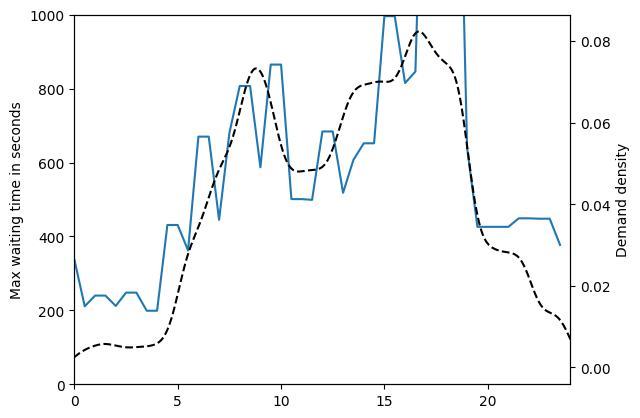

In [49]:
max_waiting_times = []
for h in np.arange(0,24,0.5):
    subset = departures[departures['departure']<(h+1)]
    subset = subset[subset['departure']>h]
    max_waiting_times.append(subset.waiting_time.max())
  

_, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot([*np.arange(0,24,0.5)], max_waiting_times)
ax1.set_ylabel('Max waiting time in seconds')
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
ax2.set_ylabel('Demand density')

plt.xlim(0,24)
ax1.set_ylim(0,1000)
#ax2.set_ylim(0,0.12)
              

In [75]:
mean_waiting_times = []
for h in np.arange(0,24,1):
    subset = departures[departures['departure']<(h+1)]
    subset = subset[subset['departure']>h]
    mean_waiting_times.append(subset.waiting_time.mean())
              

    

(0.0, 0.1)

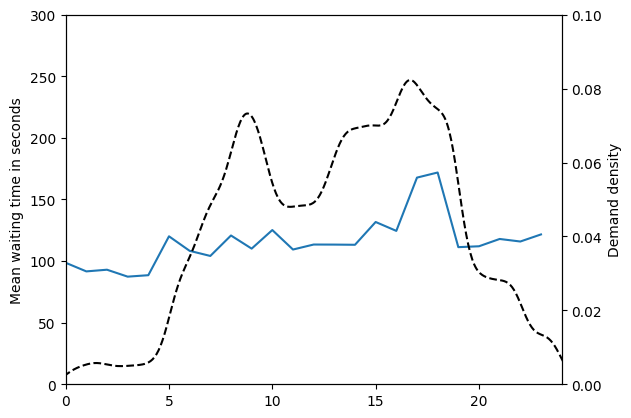

In [76]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#sns.lineplot(y="Mean waiting time in seconds", hue="ROI", data=mean_waiting_times, ax=ax1) 
ax1.plot([*np.arange(0,24,1)], mean_waiting_times)
ax1.set_ylabel('Mean waiting time in seconds')
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
ax2.set_ylabel('Demand density')

plt.xlim(0,24)
plt.xlim(0,24)
ax1.set_ylim(0,300)
ax2.set_ylim(0,0.10)
              

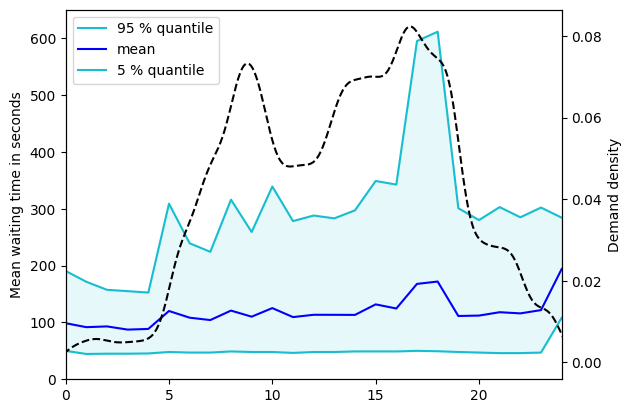

In [82]:
top95_waiting_times = []
low5_waiting_times = []
mean_waiting_times = []
for h in range(0,25,1):
    subset = departures[departures['departure']<(h+1)]
    subset = subset[subset['departure']>h]
    top95_waiting_times.append(subset.waiting_time.quantile(q=0.95))
    low5_waiting_times.append(subset.waiting_time.quantile(q=0.05))
    mean_waiting_times.append(subset.waiting_time.mean())
    
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#sns.lineplot(y="Mean waiting time in seconds", hue="ROI", data=mean_waiting_times, ax=ax1) 
ax1.plot([*range(0,25,1)], top95_waiting_times, color="#17becf")
ax1.plot([*range(0,25,1)], mean_waiting_times, color ="b")
ax1.plot([*range(0,25,1)], low5_waiting_times, color ="#17becf")
ax1.set_ylabel('Mean waiting time in seconds')
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
ax2.set_ylabel('Demand density')

ax1.fill_between([*range(0,25,1)], low5_waiting_times, top95_waiting_times, color="#17becf", alpha=0.1)

plt.xlim(0,24)
ax1.set_ylim(0,650)
#ax2.set_ylim(0,0.10)

ax1.legend(['95 % quantile',  'mean', '5 % quantile']) 
    
    

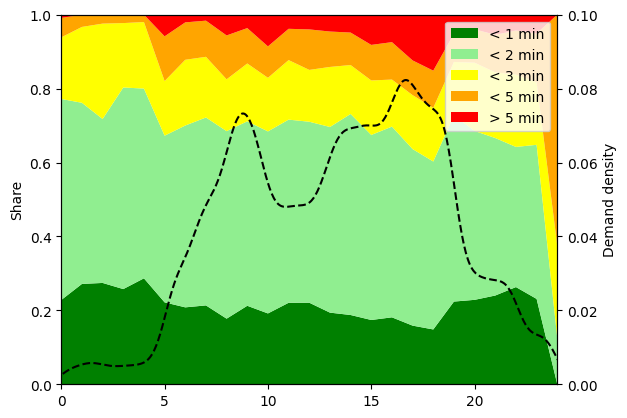

In [74]:
top95_waiting_times = []
low5_waiting_times = []
low50_waiting_times = []
top50_waiting_times = []
top75_waiting_times = []

for h in range(0,25,1):
    subset_tot = departures[departures['departure']<(h+1)]
    subset_tot = subset_tot[subset_tot['departure']>h]
   
    low5_waiting_times.append((subset_tot[subset_tot['waiting_time'] <= 60]).size/subset_tot.size)
    subset = subset_tot[subset_tot['waiting_time'] > 60]
    low50_waiting_times.append((subset[subset['waiting_time'] <= 120]).size/subset_tot.size)
    subset = subset[subset['waiting_time'] > 120]
    top50_waiting_times.append((subset[subset['waiting_time'] <= 180]).size/subset_tot.size)
    subset = subset[subset['waiting_time'] > 180]
    top75_waiting_times.append((subset[subset['waiting_time'] <= 300]).size/subset_tot.size)
    subset = subset[subset['waiting_time'] > 300]
    top95_waiting_times.append(subset.size/subset_tot.size)
    

    
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.stackplot([*range(0,25,1)], low5_waiting_times, low50_waiting_times, top50_waiting_times, top75_waiting_times, top95_waiting_times, colors=["green", "lightgreen", "yellow", "orange", "red"])
ax1.set_ylabel('Share')
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
ax2.set_ylabel('Demand density')

#ax1.fill_between([*range(0,24,1)], low5_waiting_times, top95_waiting_times, color="#17becf", alpha=0.1)

plt.xlim(0,24)
ax1.set_ylim(0,1)
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,0.10)

ax1.legend(['< 1 min', '< 2 min', '< 3 min', '< 5 min', '> 5 min']) 
    
    

               < 1 min   < 2 min   < 3 min   < 5 min   > 5 min
250 vehicles  0.120169  0.324294  0.138233  0.112066  0.305237
300 vehicles  0.159605  0.410897  0.161052  0.116118  0.152329
350 vehicles  0.188128  0.464966  0.166136  0.110413  0.070357
400 vehicles  0.213716  0.479765  0.156008  0.096854  0.053656
450 vehicles  0.217684  0.480344  0.155471  0.095655  0.050845
500 vehicles  0.222231  0.476872  0.154768  0.094705  0.051424
550 vehicles  0.223182  0.480303  0.151957  0.092472  0.052085


Text(0.5, 0, 'Share of total Trips')

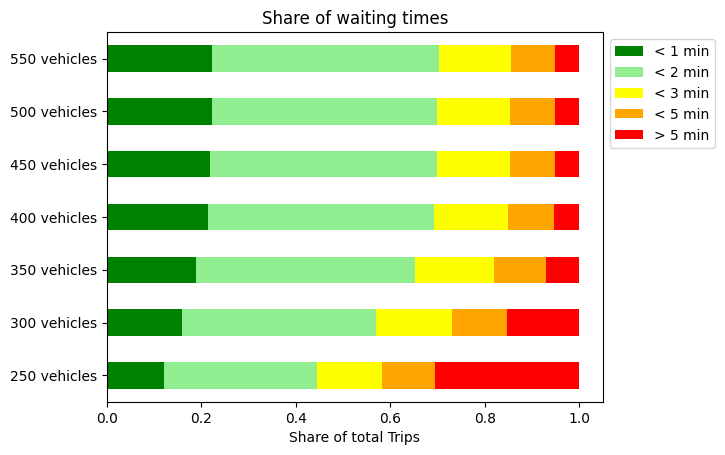

In [16]:
waiting_times_abs = [[], [], [], [], [], [], []]
i = 0
for _, df in enumerate([waiting_times250, waiting_times300, waiting_times350, waiting_times400, waiting_times450, waiting_times500, waiting_times550]):
    waiting_times_abs[i].append((df[df['waiting_time'] <= 60]['waiting_time']).size/df['waiting_time'].size)
    subset = df[df['waiting_time'] > 60]
    waiting_times_abs[i].append((subset[subset['waiting_time'] <= 120]['waiting_time']).size/df['waiting_time'].size)
    subset = subset[subset['waiting_time'] > 120]
    waiting_times_abs[i].append((subset[subset['waiting_time'] <= 180]['waiting_time']).size/df['waiting_time'].size)
    subset = subset[subset['waiting_time'] > 180]
    waiting_times_abs[i].append((subset[subset['waiting_time'] <= 300]['waiting_time']).size/df['waiting_time'].size)
    subset = subset[subset['waiting_time'] > 300]
    waiting_times_abs[i].append(subset['waiting_time'].size/df['waiting_time'].size)
    i += 1

    
waiting_times_df = pd.DataFrame (waiting_times_abs, columns = ['< 1 min', '< 2 min', '< 3 min', '< 5 min', '> 5 min'], index=["250 vehicles",  "300 vehicles", "350 vehicles", "400 vehicles", "450 vehicles", "500 vehicles", "550 vehicles"])
print(waiting_times_df)

ax = waiting_times_df.plot(
    kind = 'barh',
    stacked = True,
    title = 'Share of waiting times',
    mark_right = True,
    color=["green","lightgreen", "yellow", "orange", "red"])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel("Share of total Trips")

1827.0
123.96892989511868


,departure,duration,route_length,waiting_time
ped234_0,0.094444,464.0,5645.40,337.0
ped1251_0,5.175000,115.0,833.91,342.0
ped880_0,5.180278,106.0,824.37,330.0
ped1219_0,5.217500,128.0,829.22,327.0
ped1125_0,5.241111,102.0,807.51,414.0
...,...,...,...,...
ped23430_0,23.664722,128.0,765.71,372.0
ped23778_0,23.564167,510.0,5911.08,377.0
ped23805_0,23.583889,520.0,5872.74,348.0
ped23754_0,23.572778,562.0,6116.32,357.0


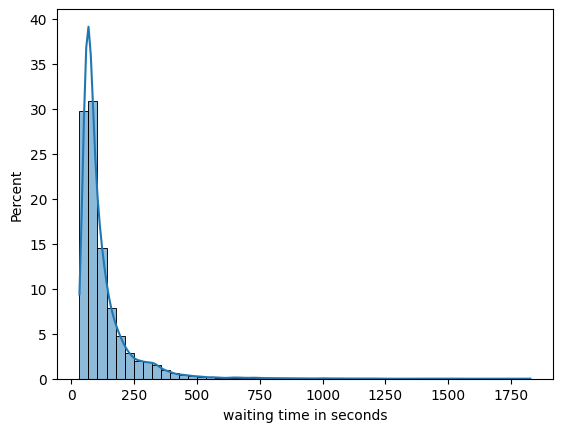

In [54]:
subset_depatures = departures[departures['departure']<24]
subset_depatures = subset_depatures[subset_depatures['departure']>0]
print(subset_depatures.waiting_time.max())
    
sns.histplot(data=subset_depatures.waiting_time, kde=True, bins=50, stat="percent", label="Weekday")
#sns.violinplot(data=subset_depatures.waiting_time)
#plt.xlim(0,3500)
plt.xlabel('waiting time in seconds')
print(subset_depatures.waiting_time.mean())
display(subset_depatures[subset_depatures['waiting_time'] > subset_depatures.waiting_time.quantile(q=0.95) -1 ])



#sns.histplot(data=departures.waiting_time, kde=True, bins=50, stat="percent", label="Weekday")
#plt.xlim(0,750)
#plt.xlabel('waiting time in seconds')

,departure,duration,route_length,waiting_time
ped15538_0,18.650278,227.0,1033.2,1827.0


0.05     48.0
0.50     86.0
0.95    326.0
Name: waiting_time, dtype: float64


Text(0, 0.5, 'probability')

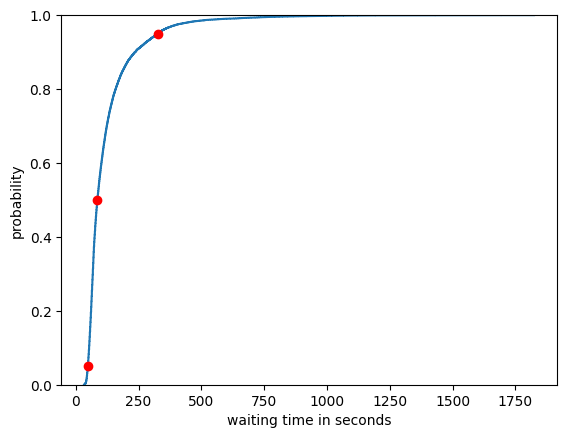

In [55]:
display(departures[departures['waiting_time'] > departures.waiting_time.quantile(q=0.99999) -1 ])



percentiles = [0.05, 0.50, 0.95]
pct_val = subset_depatures.waiting_time.quantile(q=percentiles)
print(pct_val)

sns.ecdfplot(data=subset_depatures.waiting_time)
plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
plt.xlabel('waiting time in seconds')
plt.ylabel('probability')


<AxesSubplot:>

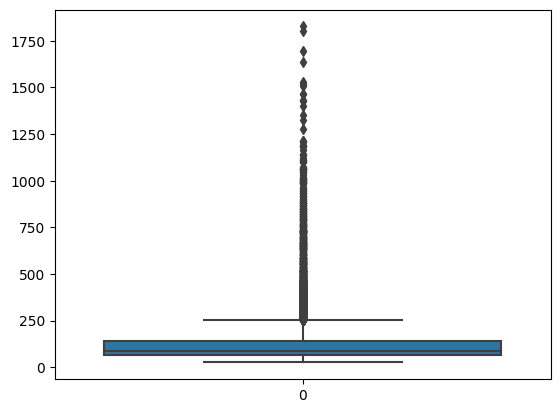

In [56]:
sns.boxplot(data=[departures.waiting_time])

0.7792793840299825


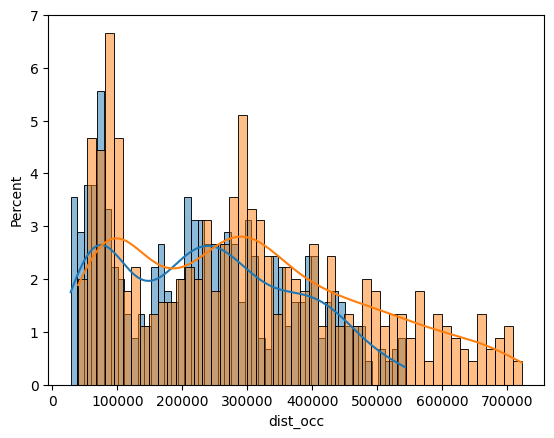

In [57]:
sns.histplot(data=stats.dist_occ, kde=True, bins=50, stat="percent", label="Weekday")
sns.histplot(data=stats.dist_total, kde=True, bins=50, stat="percent", label="Weekday")
print(stats.dist_occ.sum()/stats.dist_total.sum())

<AxesSubplot:>

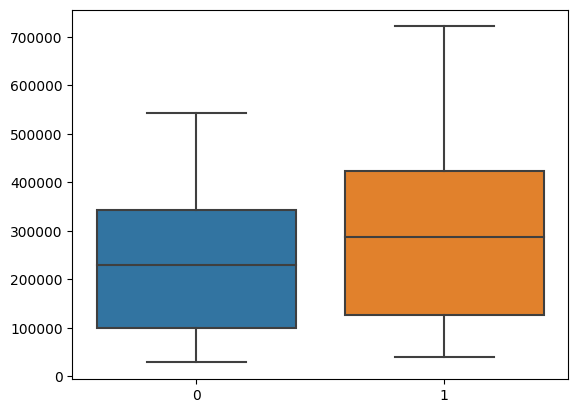

In [58]:
sns.boxplot(data=[stats.dist_occ, stats.dist_total])

<AxesSubplot:>

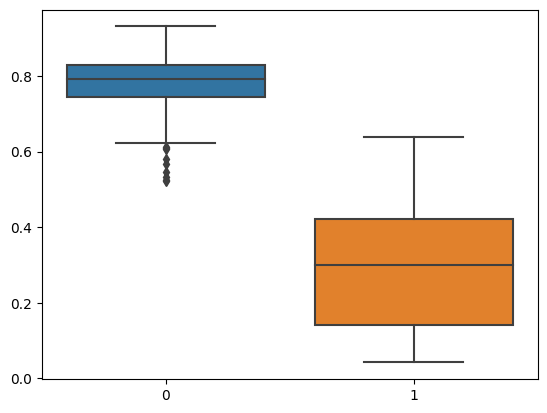

In [59]:
sns.boxplot(data=[stats.occupancy_dist, stats.occupancy_time])